In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
import numpy as np
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, f1_score, accuracy_score
from hyperopt import fmin, tpe, space_eval, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

from transformers import AutoTokenizer, AutoModel
import torch

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

import pandas as pd
import os
import time
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification
import torch

from sklearn.model_selection import train_test_split
import torch

from transformers import TrainingArguments, Trainer

import evaluate

from sklearn.utils.class_weight import compute_class_weight

from torch import nn
from transformers import Trainer
import optuna

from sklearn.model_selection import StratifiedKFold

import json

/home/losullivan/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-23 18:28:23.107647: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 18:28:23.107682: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 18:28:23.107712: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 18:28:23.132019: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary 

In [2]:

# Senolytic dataset - labelled
senolytics_df = pd.read_csv('list_of_compounds_for_training.csv')
senolytics_df

,Name,senolytic,Library,Source,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,Azaguanine-8,0,Prestwick,Not identified,c12/N=C(\NC(c1nn[nH]2)=O)/N,3.024307,441.024163,7.844935,5.327239,5.327239,...,0,0,0,0,0,0,0,0,0,0.430316
1,Allantoin,0,Prestwick,Not identified,N1C(NC(C1=O)NC(=O)N)=O,2.534439,225.377060,8.430721,5.379445,5.379445,...,0,0,0,0,0,0,0,0,2,0.325138
2,Acetazolamide,0,Prestwick,Not identified,c1(S(=O)(=O)N)sc(nn1)NC(=O)C,2.938691,422.352468,10.060478,6.513019,8.146012,...,1,0,0,0,0,0,0,0,0,0.631859
3,Metformin hydrochloride,0,Prestwick,Not identified,C(NC(=N)N)(=N)N(C)C,3.644486,126.919685,7.439158,5.524564,5.524564,...,0,0,0,0,0,0,0,0,0,0.248785
4,Atracurium besylate,0,Prestwick,Not identified,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...,0.987040,2158.836594,48.141042,41.328212,41.328212,...,0,0,0,0,0,0,0,4,0,0.038349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,Curcumin,1,"GPNCL, ENZO","Source 12 - Yousefzadeh et al, 2018",COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,1.958861,822.040000,19.811190,15.008030,15.008030,...,0,0,0,0,0,0,0,0,0,0.548123
2519,Dasatinib,1,"Unknown library, see publication source","Source 13 - Zhu et al, 2015",CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1.431593,1111.432171,23.371668,18.507135,20.079560,...,0,0,0,0,1,0,0,0,0,0.465717
2520,Navitoclax,1,"Unknown library, see publication source","Source 14 - Zhu et al, 2016",CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,1.017180,2532.551918,46.408991,36.449290,39.654708,...,1,1,0,0,0,0,0,0,0,0.104649
2521,A1331852,1,"Unknown library, see publication source","Source 15 - Zhu et al, 2017",O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...,0.969918,2030.733706,32.569974,26.984648,27.801144,...,0,0,0,0,1,0,0,0,0,0.185260


In [3]:
# Senolytic dataset - test set
test_df = pd.read_csv('list_of_compounds_for_computational_screening.csv')
test_df

,Name,Library,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,(-)-Arctigenin,Selleck,COC1=C(O)C=CC(=C1)CC2C(COC2=O)CC3=CC=C(OC)C(=C...,1.763934,816.314286,19.388541,15.728578,15.728578,13.049575,8.787575,...,0,0,0,0,0,0,0,0,0,0.753438
1,(-)-Blebbistatin,Targetmol 3338,Cc1ccc2N=C3N(CC[C@@]3(O)C(=O)c2c1)c1ccccc1,1.880486,797.989385,15.319626,12.282905,12.282905,10.593172,7.390657,...,0,0,0,0,0,0,0,0,0,0.879020
2,(-)-Borneol,Selleck,CC1(C)C2CCC1(C)C(O)C2,2.396255,185.311799,8.276021,7.723234,7.723234,4.982999,4.663847,...,0,0,0,0,0,0,0,0,0,0.566800
3,(-)-Cotinine,Targetmol 3338,CN1[C@@H](CCC1=O)c1cccnc1,2.236360,309.960601,9.259149,7.603640,7.603640,6.287694,4.444035,...,0,0,0,0,0,0,0,0,0,0.647201
4,(-)-Epicatechin gallate,Selleck,OC1=CC2=C(CC(OC(=O)C3=CC(=C(O)C(=C3)O)O)C(O2)C...,1.721352,1196.568791,23.153972,16.258499,16.258499,15.133938,9.330270,...,0,0,0,0,0,0,0,0,0,0.235487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,α-Terpineol,Selleck,CC1=CCC(CC1)C(C)(C)O,2.538576,162.201816,8.483128,7.723234,7.723234,4.999019,4.379255,...,0,0,0,0,0,0,0,0,0,0.575260
4336,β-Alanine,Selleck,NCCC(O)=O,2.831257,52.754888,4.991564,3.347026,3.347026,2.770056,1.689533,...,0,0,0,0,0,0,0,0,0,0.475392
4337,β-Caryophyllene,Selleck,CC/1=C\CCC(=C)C2CC(C)(C)C2CC1,2.119623,293.160171,11.052042,10.474691,10.474691,7.004837,6.338317,...,0,0,0,0,0,0,0,0,0,0.500562
4338,β-Elemonic Acid,Targetmol 3338,C\C(C)=C/CC[C@@H]([C@@H]1CC[C@]2(C)C3=C(CC[C@@...,1.695803,903.502499,24.396977,22.144179,22.144179,15.287200,13.412878,...,0,0,0,0,0,0,0,0,0,0.431968


In [4]:
import json


# Load the dictionary from the text file
with open("best_trial_100_try1.txt", "r") as fp:
    best_trial_dict = json.load(fp)

print(best_trial_dict['best_params'])
best_params = best_trial_dict['best_params']

{'learning_rate': 0.0002129544689531246, 'weight_decay': 0.003149550907030126, 'num_train_epochs': 9}


## Retrain model

In [5]:
#Current version
class Dataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, labels, tokenizer):
        self.dataframe = dataframe
        self.tokenizer = tokenizer

        # Tokenize the SMILES strings and store them
        self.encodings = self.tokenize_smiles(dataframe['SMILES'].tolist())

        # Store the labels
        self.labels = labels.tolist()

    def tokenize_smiles(self, smiles_list):
        return self.tokenizer(
            smiles_list,
            truncation=True,
            padding=True,
            max_length=None,
            return_tensors='pt'
        )

    def __getitem__(self, idx):
        item = {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }
        return item

    def __len__(self):
        return len(self.labels)

In [6]:
# Test dataset
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, tokenizer):
        self.dataframe = dataframe
        self.tokenizer = tokenizer

        # Tokenize the SMILES strings and store them
        self.encodings = self.tokenize_smiles(dataframe['SMILES'].tolist())

    def tokenize_smiles(self, smiles_list):
        return self.tokenizer(
            smiles_list,
            truncation=True,
            padding=True,
            max_length=None,
            return_tensors='pt'
        )

    def __getitem__(self, idx):
        item = {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
        }
        return item

    def __len__(self):
        return len(self.dataframe)

In [7]:
tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config = AutoConfig.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config.num_hidden_layers += 1
model = AutoModelForSequenceClassification.from_pretrained("DeepChem/ChemBERTa-77M-MTR", num_labels=2, problem_type = "single_label_classification")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
X = senolytics_df[['SMILES']]
y = senolytics_df['senolytic']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # the data should be shuffled

In [26]:
X_test = test_df[['SMILES']]


In [27]:
# Shuffle dataset

X_train, y_train = shuffle(X_train, y_train, random_state=42)
#X_test = shuffle(X_test, random_state=42)
train_dataset = Dataset(X_train, y_train, tokenizer)
eval_dataset = Dataset(X_val, y_val, tokenizer)
test_dataset = TestDataset(X_test, tokenizer)


In [13]:


metric = evaluate.load("f1")

In [14]:
# https://stackoverflow.com/questions/67457480/how-to-get-the-accuracy-per-epoch-or-step-for-the-huggingface-transformers-train

def compute_metrics(eval_pred):
    metrics = ["accuracy", "recall", "precision", "f1"] #List of metrics to return
    metric={}
    for met in metrics:
       metric[met] = evaluate.load(met)
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    metric_res={}
    for met in metrics:
       metric_res[met]=metric[met].compute(predictions=predictions, references=labels)[met]
    return metric_res

In [15]:
# Class weights




class_weights = compute_class_weight(class_weight="balanced",classes=np.unique(y_train),y=y_train)


print(class_weights)

[ 0.51188406 21.53658537]


In [16]:
# https://huggingface.co/docs/transformers/main/main_classes/trainer




class CustomTrainer(Trainer):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels").long()
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss with class_weights=balanced from above
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, device=model.device, dtype=torch.float))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [18]:
from transformers import TrainingArguments, Trainer

# many more parameters to experiment with https://huggingface.co/docs/transformers/v4.33.2/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(output_dir="test_2", load_best_model_at_end=True, evaluation_strategy='epoch',
    logging_strategy="epoch", save_strategy="epoch",per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,optim="adamw_torch", num_train_epochs=best_params['num_train_epochs'], learning_rate=best_params['learning_rate'],
                                  weight_decay=best_params['weight_decay']) # switch optimizer to avoid warning)


In [28]:
from transformers import TrainerCallback
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Define a callback for printing validation loss
class PrintValidationLossCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, **kwargs):
        if state is not None and hasattr(state, 'eval_loss'):
            print(f"Validation loss: {state.eval_loss:.4f}")

# Add the callback to the trainer
trainer.add_callback(PrintValidationLossCallback())
#trainer.train()

In [29]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.534700,1.790607,0.978864,0.294118,0.555556,0.384615
2,0.288800,1.876079,0.980185,0.352941,0.600000,0.444444
3,0.160800,1.714818,0.976222,0.529412,0.473684,0.500000
4,0.167100,2.307503,0.981506,0.470588,0.615385,0.533333
5,0.139700,2.266221,0.978864,0.470588,0.533333,0.500000
6,0.024800,2.550157,0.978864,0.470588,0.533333,0.500000
7,0.061700,2.487109,0.981506,0.470588,0.615385,0.533333
8,0.050500,2.594539,0.981506,0.470588,0.615385,0.533333
9,0.014500,2.711041,0.982827,0.411765,0.700000,0.518519


TrainOutput(global_step=999, training_loss=0.16028531857796977, metrics={'train_runtime': 54.9616, 'train_samples_per_second': 289.183, 'train_steps_per_second': 18.176, 'total_flos': 74375638590240.0, 'train_loss': 0.16028531857796977, 'epoch': 9.0})

## Best model

In [21]:
#model = AutoModelForSequenceClassification.from_pretrained("/home/losullivan/chemberta_hyperparameter/full_model_2")

In [30]:
model.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(600, 384, padding_idx=1)
      (position_embeddings): Embedding(515, 384, padding_idx=1)
      (token_type_embeddings): Embedding(1, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.144, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-2): 3 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.109, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
             

In [31]:

predictions = trainer.predict(test_dataset)

In [32]:
len(predictions.predictions)

4340

In [33]:
len(test_df)

4340

In [34]:
y_pred = np.argmax(predictions.predictions, axis=-1)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [35]:
y_pred.sum()

192

In [36]:
test_df['prediction'] = y_pred

In [37]:
test_df_predicted = test_df[test_df['prediction']==1]

In [38]:
test_df_predicted[['Name', 'Library', 'SMILES', 'prediction']]


,Name,Library,SMILES,prediction
0,(-)-Arctigenin,Selleck,COC1=C(O)C=CC(=C1)CC2C(COC2=O)CC3=CC=C(OC)C(=C...,1
20,(+)-Fangchinoline,Selleck,COC1=C2OC3=CC=C(CC4N(C)CCC5=C4C=C(OC6=C7C(CC(=...,1
89,2-Cl-IB-MECA,Targetmol 3338,CNC(=O)C1OC(C(O)C1O)n1cnc2c(NCc3cccc(I)c3)nc(C...,1
244,Adavivint (SM04690),Selleck,CC(C)CC(=O)NC1=CN=CC(=C1)C2=CC3=C([NH]N=C3C4=N...,1
348,AMG900,Targetmol 3338,CC1=CSC(=C1)C1=NN=C(NC2=CC=C(OC3=C(C=CC=N3)C3=...,1
...,...,...,...,...
4232,VS5584,Targetmol 3338,CC(C)n1c(C)nc2c1nc(nc2c1cnc(N)nc1)N1CCOCC1,1
4315,Zibotentan (ZD4054),Selleck,COC1=NC(=CN=C1N[S](=O)(=O)C2=CC=CN=C2C3=CC=C(C...,1
4321,Ziprasidone HCl,Selleck,Cl.ClC1=CC2=C(CC(=O)N2)C=C1CCN3CCN(CC3)C4=NSC5...,1
4323,ZK 756326,Targetmol 3338,C1CN(CCN1CCOCCO)CC2=CC(=CC=C2)OC3=CC=CC=C3.Cl.Cl,1


In [39]:
true_senolytics = ['Periplocin', 'Oleandrin', 'Ginkgetin']

for senolytic in true_senolytics:
  if senolytic in list(test_df_predicted['Name']):
    print(senolytic)

Periplocin
Oleandrin


In [40]:
from torch import nn

y_predict_proba = nn.functional.softmax(torch.from_numpy(predictions.predictions), dim=-1)
y_predict_proba

tensor([[2.9933e-02, 9.7007e-01],
        [9.9998e-01, 2.3923e-05],
        [9.9998e-01, 2.2602e-05],
        ...,
        [9.9964e-01, 3.6088e-04],
        [9.9999e-01, 1.0810e-05],
        [9.9999e-01, 6.0522e-06]])

In [41]:
test_df['prediction probability'] = y_predict_proba[:,1]

In [42]:
test_df_predictions = test_df[['Name', 'Library', 'SMILES', 'prediction', 'prediction probability']]
test_df_predictions

,Name,Library,SMILES,prediction,prediction probability
0,(-)-Arctigenin,Selleck,COC1=C(O)C=CC(=C1)CC2C(COC2=O)CC3=CC=C(OC)C(=C...,1,0.970067
1,(-)-Blebbistatin,Targetmol 3338,Cc1ccc2N=C3N(CC[C@@]3(O)C(=O)c2c1)c1ccccc1,0,0.000024
2,(-)-Borneol,Selleck,CC1(C)C2CCC1(C)C(O)C2,0,0.000023
3,(-)-Cotinine,Targetmol 3338,CN1[C@@H](CCC1=O)c1cccnc1,0,0.000051
4,(-)-Epicatechin gallate,Selleck,OC1=CC2=C(CC(OC(=O)C3=CC(=C(O)C(=C3)O)O)C(O2)C...,0,0.001956
...,...,...,...,...,...
4335,α-Terpineol,Selleck,CC1=CCC(CC1)C(C)(C)O,0,0.000054
4336,β-Alanine,Selleck,NCCC(O)=O,0,0.000015
4337,β-Caryophyllene,Selleck,CC/1=C\CCC(=C)C2CC(C)(C)C2CC1,0,0.000361
4338,β-Elemonic Acid,Targetmol 3338,C\C(C)=C/CC[C@@H]([C@@H]1CC[C@]2(C)C3=C(CC[C@@...,0,0.000011


In [43]:
test_df_predictions.sort_values(by=['prediction probability'], ascending=False)

,Name,Library,SMILES,prediction,prediction probability
2911,Oleandrin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@@]3(C)[C@H](CC[C@@H...,1,0.999993
3078,Periplocin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@]3(C)[C@H]4CC[C@]5(...,1,0.999990
3330,pyrvinium,Selleck,CN(C)C1=CC2=CC=C(/C=C/C3=C(C)[N](C(=C3)C)C4=CC...,1,0.999972
2890,Obacunone,Targetmol 3338,CC1([C@@H]2CC(=O)[C@@]3([C@@H]([C@]2(C=CC(=O)O...,1,0.999970
2838,Norcantharidin,Targetmol 3338,C1CC2C3C(C1O2)C(=O)OC3=O,1,0.999960
...,...,...,...,...,...
1002,Chloroquine diphosphate,Targetmol 3338,OP(O)(O)=O.OP(O)(O)=O.CCN(CC)CCCC(C)Nc1ccnc2cc...,0,0.000003
3536,Sarsasapogenin,Targetmol 3338,O1[C@@H]2[C@@H]([C@@]3([C@H]([C@H]4[C@@H]([C@@...,0,0.000003
929,Cefodizime Sodium,Selleck,[Na+].[Na+].CO/N=C(/C(=O)NC1C2SCC(=C(N2C1=O)C(...,0,0.000003
865,Carbenoxolone Sodium,Selleck,[Na+].[Na+].CC1(C)C(CCC2(C)C1CCC3(C)C2C(=O)C=C...,0,0.000003


In [44]:
test_df_predictions[test_df_predictions['Name'].isin(true_senolytics)]


,Name,Library,SMILES,prediction,prediction probability
1800,Ginkgetin,Targetmol 3338,COc1cc(O)c2c(c1)oc(cc2=O)-c1ccc(OC)c(c1)-c1c(O...,0,0.002611
2911,Oleandrin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@@]3(C)[C@H](CC[C@@H...,1,0.999993
3078,Periplocin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@]3(C)[C@H]4CC[C@]5(...,1,0.999990


In [50]:
test_df_predictions[test_df_predictions['prediction probability']>0.4].sort_values(by=['prediction probability'], ascending=False)

,Name,Library,SMILES,prediction,prediction probability
2911,Oleandrin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@@]3(C)[C@H](CC[C@@H...,1,0.999993
3078,Periplocin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@]3(C)[C@H]4CC[C@]5(...,1,0.999990
3330,pyrvinium,Selleck,CN(C)C1=CC2=CC=C(/C=C/C3=C(C)[N](C(=C3)C)C4=CC...,1,0.999972
2890,Obacunone,Targetmol 3338,CC1([C@@H]2CC(=O)[C@@]3([C@@H]([C@]2(C=CC(=O)O...,1,0.999970
2838,Norcantharidin,Targetmol 3338,C1CC2C3C(C1O2)C(=O)OC3=O,1,0.999960
...,...,...,...,...,...
396,Anisindione,Selleck,COC1=CC=C(C=C1)C2C(=O)C3=C(C=CC=C3)C2=O,0,0.412542
2160,Ivabradine HCl,Selleck,Cl.COC1=CC2=C(CC(=O)N(CCCN(C)CC3CC4=CC(=C(OC)C...,0,0.411954
394,Anidulafungin (LY303366),Selleck,CCCCCOC1=CC=C(C=C1)C2=CC=C(C=C2)C3=CC=C(C=C3)C...,0,0.405793
2034,Idebenone,Selleck,COC1=C(OC)C(=O)C(=C(C)C1=O)CCCCCCCCCCO,0,0.405268


In [51]:
test_df_predictions[test_df_predictions['prediction probability']>0.4].sort_values(by=['prediction probability'], ascending=False).head(20)

,Name,Library,SMILES,prediction,prediction probability
2911,Oleandrin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@@]3(C)[C@H](CC[C@@H...,1,0.999993
3078,Periplocin,Targetmol 3338,CO[C@H]1C[C@H](O[C@H]2CC[C@]3(C)[C@H]4CC[C@]5(...,1,0.999990
3330,pyrvinium,Selleck,CN(C)C1=CC2=CC=C(/C=C/C3=C(C)[N](C(=C3)C)C4=CC...,1,0.999972
2890,Obacunone,Targetmol 3338,CC1([C@@H]2CC(=O)[C@@]3([C@@H]([C@]2(C=CC(=O)O...,1,0.999970
2838,Norcantharidin,Targetmol 3338,C1CC2C3C(C1O2)C(=O)OC3=O,1,0.999960
2601,Milbemycin Oxime,Selleck,CC[C@@H]1[C@H](CC[C@@]2(O1)C[C@@H]3C[C@H](O2)C...,1,0.999959
457,Ascomycin (FK520),Selleck,CCC1/C=C(C)/CC(C)CC(OC)C2OC(O)(C(C)CC2OC)C(=O)...,1,0.999951
2298,Lanatoside C,Selleck,CC1OC(CC(O)C1OC2CC(O)C(OC3CC(OC(C)=O)C(OC4OC(C...,1,0.999950
3172,Pimecrolimus,Selleck,CCC1/C=C(C)/CC(C)CC(OC)C2OC(O)(C(C)CC2OC)C(=O)...,1,0.999943
2492,Mebhydrolin napadisylate,Selleck,CN1CCC2=C(C1)C3=C(C=CC=C3)[N]2CC4=CC=CC=C4.CN5...,1,0.999940


In [53]:
test_df_predictions[test_df_predictions['prediction probability']>0.4].sort_values(by=['prediction probability'], ascending=True).head(20)

,Name,Library,SMILES,prediction,prediction probability
4019,Tozasertib,Targetmol 3338,CN1CCN(CC1)c1cc(Nc2cc(C)[nH]n2)nc(Sc2ccc(NC(=O...,0,0.404177
2034,Idebenone,Selleck,COC1=C(OC)C(=O)C(=C(C)C1=O)CCCCCCCCCCO,0,0.405268
394,Anidulafungin (LY303366),Selleck,CCCCCOC1=CC=C(C=C1)C2=CC=C(C=C2)C3=CC=C(C=C3)C...,0,0.405793
2160,Ivabradine HCl,Selleck,Cl.COC1=CC2=C(CC(=O)N(CCCN(C)CC3CC4=CC(=C(OC)C...,0,0.411954
396,Anisindione,Selleck,COC1=CC=C(C=C1)C2C(=O)C3=C(C=CC=C3)C2=O,0,0.412542
3458,Rofecoxib,Selleck,C[S](=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=C...,0,0.414793
1488,Emedastine,Selleck,CCOCC[N]1C2=C(C=CC=C2)N=C1N3CCCN(C)CC3,0,0.415396
1759,Ganoderic acid A,Targetmol 3338,CC(CC(=O)CC(C)C(=O)O)C1CC(C2(C1(CC(=O)C3=C2C(C...,0,0.418366
1571,Ethidium bromide,Selleck,[Br-].CC[N+]1=C2C=C(N)C=CC2=C3C=CC(=CC3=C1C4=C...,0,0.419154
3346,R406,Selleck,COC1=C(OC)C(=CC(=C1)NC2=NC(=C(F)C=N2)NC3=NC4=C...,0,0.425871


In [54]:
test_df_predictions.to_csv('chemberta2_finetuned_screen.csv', index=True)

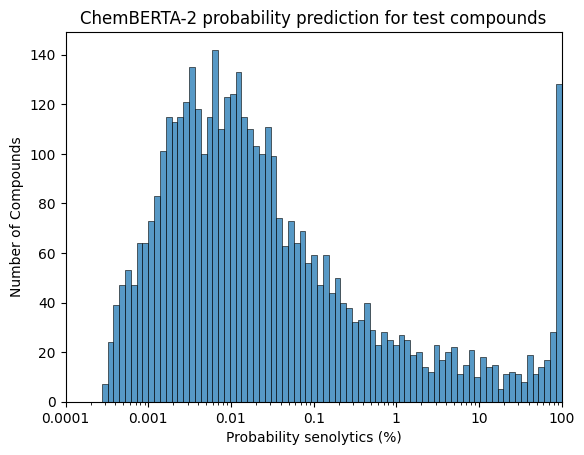

In [48]:
from matplotlib.ticker import ScalarFormatter
sns.histplot(data=test_df, x=100*test_df["prediction probability"],
    log_scale=True, binwidth=0.07)

plt.title("ChemBERTA-2 probability prediction for test compounds")
plt.ylabel('Number of Compounds')
plt.xlabel('Probability senolytics (%)')
#plt.xscale('log')
#plt.xticks([0.001, 0.01, 0.1, 1, 100])  # Set label locations.)
plt.xlim([0.001, 100])
# Define the desired tick positions and labels
tick_positions = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
tick_labels = ['0.0001', '0.001', '0.01', '0.1', '1', '10', '100']

# Set the tick positions and labels on the x-axis
plt.xticks(tick_positions, tick_labels)
plt.show()